# Analysis of Ford GoBike's Trip Data


#### What does Ford GoBike do?
According to Ford GoBike's Website - Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across San Francisco, East Bay and San Jose.

#### About the data
The trip data provided by Ford GoBike are anonymized and includes: Trip Duration (seconds), Start Time and Date, End Time and Date, Start Station ID, Start Station Name, Start Station Latitude, Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID, User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual), Member Year of Birth and Member Gender.

### Importing all required libraries

In [5]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline
import seaborn as sns
from requests import get
import os
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

### Gathering the Data

In [7]:
#Downloading the dataset
folder_for_trip_data = 'trip_data'

if not os.path.exists(folder_for_trip_data):
    makedirs(folder_for_trip_data)
    pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_for_trip_data))
    for month in range(1,12):
        month_string = str(month)
        month_leading_zero = month_string.zfill(2)
    
        bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
        response = get(bike_data_url)
        
        unzipped_file = ZipFile(BytesIO(response.content))
        
        # moving extracted files into folder trip_data
        unzipped_file.extractall(folder_for_trip_data)

In [48]:
#Concatenating all files into one df
data_files = []
for file_name in listdir(folder_for_trip_data):
    data_files.append(pd.read_csv(folder_for_trip_data+'/'+file_name, index_col=0))
df = pd.concat(data_files)

### Assessing the gathered data

In [34]:
df.shape

(2252058, 16)

In [35]:
df.head(3)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
56791,1230,No,NaN,78.0,37.773717,-122.411647,Folsom St at 9th St,2018-06-01 13:28:22.7220,NaN,NaN,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2018-05-31 21:41:51.4750,Customer
52797,3414,No,NaN,338.0,37.803189,-122.270579,13th St at Franklin St,2018-06-01 09:19:51.5410,1983.0,Male,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2018-05-31 18:39:53.7690,Subscriber
43204,2677,No,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-06-01 09:09:52.4850,NaN,NaN,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-05-31 21:09:48.0150,Customer


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 56791 to 368
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(1), object(7)
memory usage: 292.1+ MB


In [79]:
sum(df['bike_share_for_all_trip'].isnull())

519700

In [84]:
#Creating a copy of df before cleaning
df_copy = df.copy()

In [85]:
#Dropping column 'bike_share_for_all_trip' since 2017 doesn't have this data
df_copy.drop(columns = ['bike_share_for_all_trip'], inplace = True)

In [86]:
df_copy.shape

(2252058, 15)

#### Analysing the approx. age of members

In [87]:
#Creating a new column for approx. age of all members
df_copy['member_age'] = 2019-df_copy['member_birth_year']

In [88]:
df_copy.member_age.describe()

count    2.079810e+06
mean     3.653289e+01
std      1.051074e+01
min      1.900000e+01
25%      2.900000e+01
50%      3.400000e+01
75%      4.200000e+01
max      1.380000e+02
Name: member_age, dtype: float64

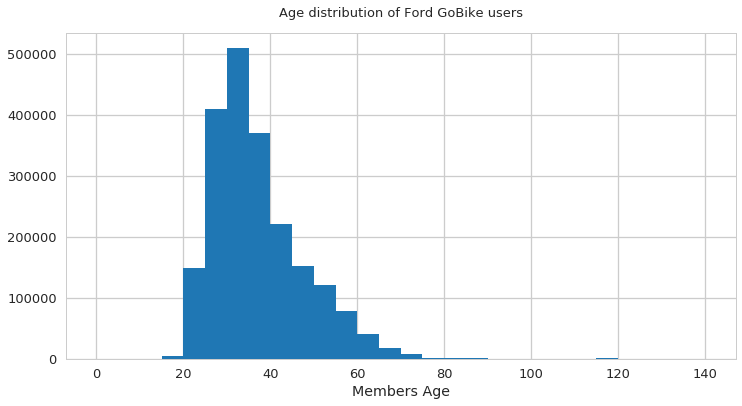

In [285]:
# Check age distrubition
plt.figure(figsize = (12, 6))
bin_edges = np.arange(0, df_copy['member_age'].max()+5, 5)
plt.hist(data = df_copy[~np.isnan(df_copy['member_age'])], x = 'member_age', bins = bin_edges)
plt.title("Age distribution of Ford GoBike users", fontsize=13, y=1.03)
plt.xlabel("Members Age");

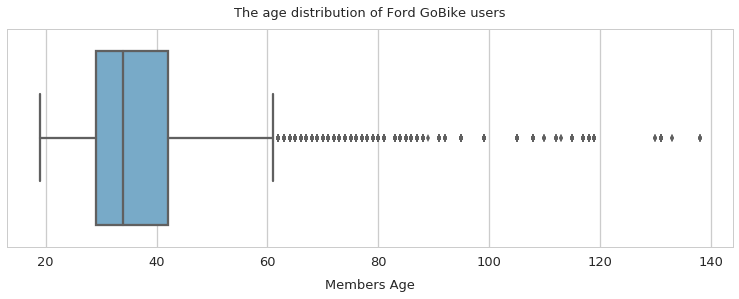

In [101]:
#Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

plt.figure(figsize=(13, 4))
sns.boxplot(x='member_age', data=df_copy, palette='Blues', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=13, y=1.03)
plt.xlabel("Members Age", fontsize=13, labelpad=10)
plt.savefig('image01.png');

We can see that all members are adults with median age of 34 years and three-fourth of them are less than 42 years old, also there are some outliers with ages much higher (> 100 years) than the average life expectancy of the US (78.69 years).

Assuming that members above 65 years are more likely to not opt for bike rides we shall ignore records with ages above 65 years.

In [124]:
df_60 = df_copy[df_copy['member_age'] <= 60].copy()

In [125]:
df_60['member_age'].mean()

35.653461404149191

Ford GoBike operates in San Francisco, Oakland and San Jose. However for simplicity let's focus on San Fancisco area.

In [126]:
#Filter data only to include San Francisco rides
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [127]:
end_station_latitude_mask = (df_60['end_station_latitude']>=min_latitude_sf) & (df_60['end_station_latitude']<=max_latitude_sf)
start_station_latitude_mask = (df_60['start_station_latitude']>=min_latitude_sf) & (df_60['start_station_latitude']<=max_latitude_sf)

In [128]:
end_station_longitude_mask =(df_60['end_station_longitude']>=min_longitude_sf) & (df_60['end_station_longitude']<=max_longitude_sf)
start_station_longitude_mask = (df_60['start_station_longitude']>=min_longitude_sf) & (df_60['start_station_longitude']<=max_longitude_sf)

In [129]:
sf_df = df_60[end_station_latitude_mask & start_station_latitude_mask & end_station_longitude_mask & start_station_longitude_mask]

In [130]:
len(sf_df)

1497685

Therefore out of around 2.25 millions total observations around 1.5 millions from San Francisco.

In [131]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497685 entries, 67102 to 368
Data columns (total 16 columns):
bike_id                    1497685 non-null int64
duration_sec               345063 non-null float64
end_station_id             1497685 non-null float64
end_station_latitude       1497685 non-null float64
end_station_longitude      1497685 non-null float64
end_station_name           1497685 non-null object
end_time                   1497685 non-null object
member_birth_year          1497685 non-null float64
member_gender              1497685 non-null object
start_station_id           1497685 non-null float64
start_station_latitude     1497685 non-null float64
start_station_longitude    1497685 non-null float64
start_station_name         1497685 non-null object
start_time                 1497685 non-null object
user_type                  1497685 non-null object
member_age                 1497685 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 194.2+ MB


In [132]:
sf_df.columns

Index(['bike_id', 'duration_sec', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'end_time',
       'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type', 'member_age'],
      dtype='object')

### What is the structure of your dataset?

> The data has more than 1.5 million records (rides made in San Francisco) in the dataset with 16 features like bike_id, user_type, member_age, start_station_name etc. The dataset has both numeric and non numeric data.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in understanding the below aspects of users and rides,
  - Average duration of rides
  - Average distance of rides
  - Kind of ride - Leisure or to go far away  
  - Age groups of users  
  - Gender
  - Distrubition of rides on each day of a week

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'duration_sec', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'end_station_name', 'end_time', 'member_gender', 'start_station_id','start_station_latitude', 'start_station_longitude', 'start_station_name', 'start_time', 'user_type', and 'member_age'

## Univariate Exploration

In [133]:
#Changing the datatype of start_time and end_time
sf_df['start_time'] = pd.to_datetime(sf_df['start_time'])
sf_df['end_time']=pd.to_datetime(sf_df['end_time'])

In [134]:
sf_df['start_time_date'] = sf_df['start_time'].dt.date
sf_df['end_time_date'] = sf_df['end_time'].dt.date

In [135]:
sf_df['start_time_year_month'] = sf_df['start_time'].map(lambda x: x.strftime('%Y-%m'))
sf_df['end_time_year_month'] = sf_df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [136]:
sf_df['start_time_year_month_renamed'] = sf_df['start_time'].dt.strftime('%y' + '-' + '%m')

In [137]:
sf_df['start_time_year'] = sf_df['start_time'].dt.year.astype(int)
sf_df['end_time_year'] = sf_df['end_time'].dt.year.astype(int)

In [138]:
sf_df['start_time_month'] = sf_df['start_time'].dt.month.astype(int)
sf_df['end_time_month'] = sf_df['end_time'].dt.month.astype(int)

In [139]:
sf_df['start_time_hour_minute'] = sf_df['start_time'].map(lambda x: x.strftime('%H-%m'))
sf_df['end_time_hour_minute'] = sf_df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [140]:
sf_df['start_time_hour'] = sf_df['start_time'].dt.hour
sf_df['end_time_hour'] = sf_df['end_time'].dt.hour

In [141]:
sf_df['start_time_weekday'] = sf_df['start_time'].dt.weekday_name
sf_df['end_time_weekday'] = sf_df['end_time'].dt.weekday_name

In [142]:
sf_df['start_time_weekday_abbr'] = sf_df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
sf_df['end_time_weekday_abbr'] = sf_df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [143]:
#New column that groups the ages of members
sf_df['member_age_bins'] = sf_df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [144]:
#New column for trip duration in minutes
sf_df['duration_min'] = sf_df['duration_sec']/60

In [145]:
#Generate new fields for distance
def distance(origin, destination):
    """
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [146]:
sf_df['distance_km_estimates'] = sf_df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
sf_df['distance_miles_estimates'] = sf_df['distance_km_estimates']*0.621371

### Question 1. How is Ford GoBike's ridership growing?

#### Average number of rides per bike per day

Let's get the number of rides per bike (bike usage) for August 2017 and August 2018 and see how it has changed.

In [151]:
ride_counts = sf_df.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()

In [152]:
count_of_unique_rides = sf_df.groupby('start_time_year_month_renamed')['bike_id'].nunique().reset_index().rename(columns={'bike_id':'unique_bike_id'})

In [153]:
rides_count_df = ride_counts.merge(count_of_unique_rides, on='start_time_year_month_renamed')

In [154]:
rides_count_df['number_of_used'] = rides_count_df['bike_id']/rides_count_df['unique_bike_id']

In [155]:
august_2017_avg_daily_rides = (rides_count_df[rides_count_df['start_time_year_month_renamed']=='17-08']['number_of_used'].mean())/31

In [156]:
august_2018_avg_daily_rides = (rides_count_df[rides_count_df['start_time_year_month_renamed']=='18-08']['number_of_used'].mean())/31

In [159]:
(august_2017_avg_daily_rides, august_2018_avg_daily_rides)

(1.1654695050280788, 2.6110622986485921)

In [160]:
august_2018_avg_daily_rides / august_2017_avg_daily_rides

2.2403523107073364

Therefore the number of rides per bike (bike usage) have more than doubled in August 2018 (2.611) when compared to the same month in 2017(1.165).

#### Distribution of daily bike rides from July 2017 to November 2018

In [161]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

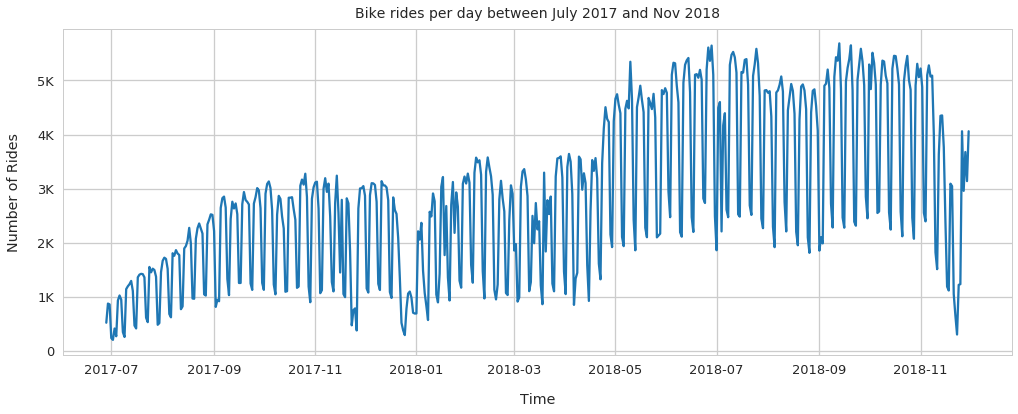

In [167]:
sf_df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,6))
plt.title('Bike rides per day between July 2017 and Nov 2018', fontsize = 14, y=1.015)
plt.xlabel('Time', labelpad=16)
plt.ylabel('Number of Rides', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image02.png');

Generally the trend is upward. Number of rides per day has increased from nearly 1000 to around 5000 form July 2017 to Nov 2018. Also we can observe that there are huge falls in the winter months of both 2017 and 2018.

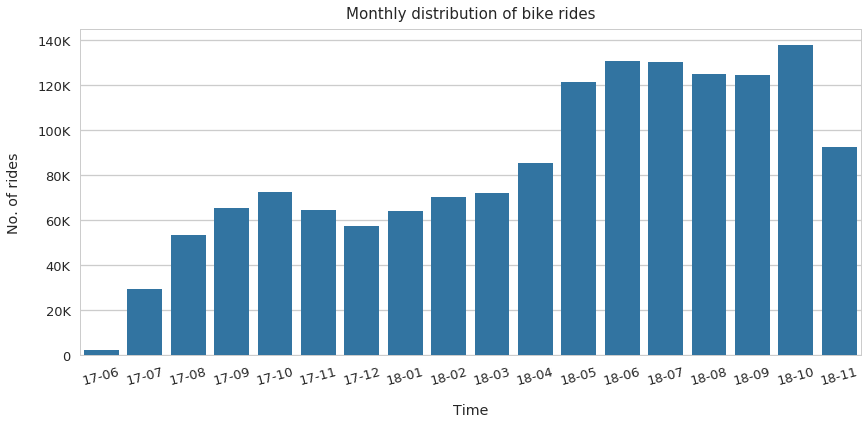

In [172]:
plt.figure(figsize=(14,6))
base_color = sns.color_palette()[0]
sns.countplot(x='start_time_year_month_renamed', color = base_color, data=sf_df.sort_values(by='start_time_year_month_renamed'))
plt.title('Monthly distribution of bike rides', fontsize=15, y=1.015)
plt.xlabel('Time', labelpad=16)
plt.xticks(rotation = 15)
plt.ylabel('No. of rides', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image03.png')

We can again see the upward trend. Number of rides per month has increased from nearly 30000 to nearly 140000 form July 2017 to October 2018. Also we can observe the falls in the winter months of both 2017 and 2018.

#### Number of bike rides by age group per month

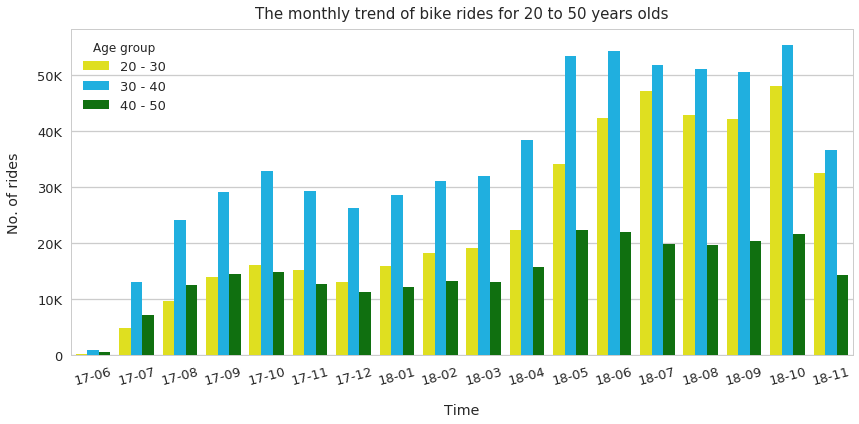

In [175]:
plt.figure(figsize=(14,6))
my_palette = {'20 - 30': 'yellow', '30 - 40': 'deepskyblue', '40 - 50': 'green'}
ax = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=my_palette, data=sf_df[sf_df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly trend of bike rides for 20 to 50 years olds', fontsize=15, y=1.015)
plt.xlabel('Time', labelpad=16)
plt.xticks(rotation = 15)
plt.ylabel('No. of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Age group',prop={'size':12})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image04.png');

We can see a lot of growth coming from young members between 20 and 40 years old.

### Question 2. How age, gender, day of week and hour of day impact number of rides?

#### Total rides

In [176]:
sf_df['bike_id'].sum()

3298048446

There are nearly 3.3 billion rides.

#### Distrubition of bike rides for different age groups

In [177]:
trip_by_age_df = sf_df.groupby('member_age_bins').agg({'bike_id':'count'})

In [178]:
trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100

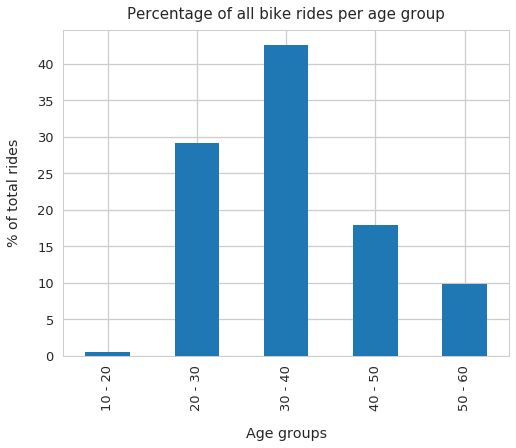

In [181]:
trip_by_age_df['perc'].plot(kind='bar', color = base_color, figsize=(8,6))
plt.title('Percentage of all bike rides per age group', fontsize = 15, y=1.015)
plt.xlabel('Age groups', labelpad=16)
plt.ylabel('% of total rides', labelpad=16)
plt.savefig('image05.png');

20 to 40 years old people took the more than 70 percent of bike rides. Among all, 30 to 40 years old account for more than 40 percent of all bike rides.

#### Bike rides per gender

In [182]:
trip_by_gender_df = sf_df.groupby('member_gender').agg({'bike_id':'count'})

In [183]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

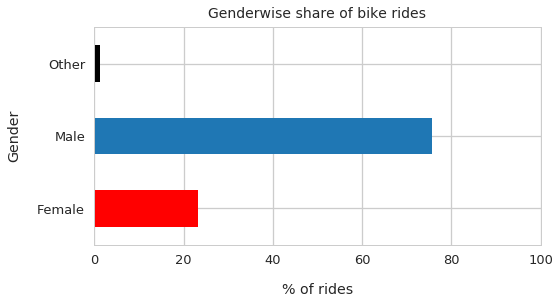

In [187]:
new_color = ['red', base_color, 'black']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(8,4))
plt.title('Genderwise share of bike rides', fontsize=14, y=1.015)
plt.ylabel('Gender', labelpad=16)
plt.xlabel('% of rides', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('image06.png');

Males took around more than 75 percent of all bike rides, and female took around more than 20 percent.

#### Bike rides on each day of week

In [188]:
trip_by_weekday_df = sf_df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

In [189]:
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

In [190]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

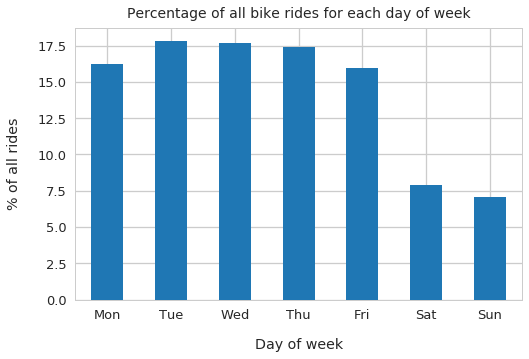

In [193]:
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=base_color, figsize=(8,5), legend=False)
plt.title('Percentage of all bike rides for each day of week', fontsize=14, y=1.015)
plt.xlabel('Day of week', labelpad=16)
plt.ylabel('% of all rides', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image07.png');

Users use this service more on weekdays than weekends. May be they prefer to commute to work by bikes.

#### Peak hours of the day

In [194]:
trip_by_hour_df = sf_df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [195]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

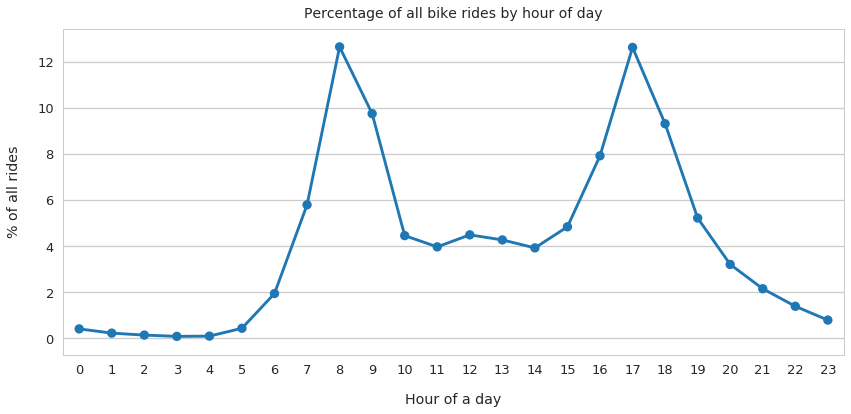

In [199]:
plt.figure(figsize=(14,6))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of day', fontsize=14, y=1.015)
plt.xlabel('Hour of a day', labelpad=16)
plt.ylabel('% of all rides', labelpad=16)
plt.savefig('image08.png');

The peak usage occurs during peak hours (8 to 9 am and 5 to 6 pm). This shows users are commuting to and from office using this service.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I checked each variables one by one. (Average rides, daily and monthly trend of riders, age groups, genders, weekdays or weekends comparision, peak hours, user types with distances etc.) 
All these variables are important in order to understand the dataset and communicating the datafindings at the end of this project.  

#### Observations made:
    a. 20 to 40 years old people took the more than 70 percent of bike rides. Among all, 30 to 40 years old account for more than 40 percent of all bike rides.
    b. Males took around more than 75 percent of all bike rides, and female took around more than 20 percent.
    c. Users use this service more on weekdays than weekends. May be they prefer to commute to work by bikes.
    d. The peak usage occurs during peak hours (8 to 9 am and 5 to 6 pm). This shows users are commuting to and from office using this service.

No transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    a. Records of senior users above the age of 60 years and those who had unrealistic ages like more than 110 years were ignored for analysis. More than 95 percent of the users were below 60.  

    b. New columns such as duration, time, age groups etc. were created for plotting them conveniently.

    c. The sercive was analysed only for San Francisco as it was big city compared to Oakland and San Jose. Also this helped in reducing the number of records.

## Bivariate Exploration


### Question 3. Are there any difference between subscribers and casual customers?

#### Percentage of bike rides of subscribers and customers

In [201]:
count_of_rides_per_user_type = sf_df.groupby('user_type').size().reset_index(name='count')

In [203]:
count_of_rides_per_user_type['count']/len(sf_df)*100

0    11.873992
1    88.126008
Name: count, dtype: float64

Subscribers had contributed around 88 percent of the rides where as casual customers had nearly 12 percent.

#### Trends in bike rides of subscribers and customers

In [204]:
user_type_count_per_year_df = sf_df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

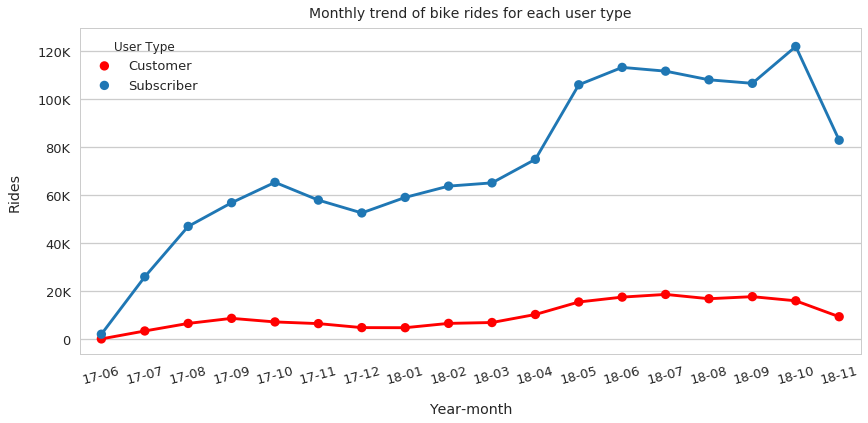

In [207]:
plt.figure(figsize=(14,6))
my_palette = {'Subscriber':base_color, 'Customer':'red'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('Monthly trend of bike rides for each user type', fontsize=14, y=1.015)
plt.xlabel('Year-month', labelpad=16)
plt.xticks(rotation = 15)
plt.ylabel('Rides', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':12})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image09.png');

Number of rides coming from subscribers had grown steadily since June 2017, leaving winter of 2018, where as for casual customers the growth had remained almost flat.

#### Average trip duration of subscribers vs customers

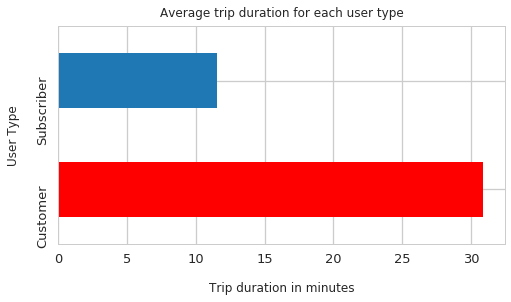

In [219]:
new_color=['red', base_color]
ax = sf_df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(8,4))
ax.set_title('Average trip duration for each user type', fontsize=12, y=1.015)
ax.set_ylabel('User Type', labelpad=16, fontsize=12)
plt.yticks(rotation = 90)
ax.set_xlabel('Trip duration in minutes', labelpad=16, fontsize=12);

Subscribers' average trip duration is around 11 minutes and customers' average trip duration is around 28 minutes.  

#### Average trip distance of subscribers vs customers

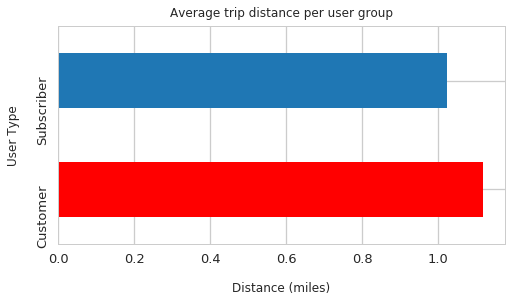

In [224]:
ax = sf_df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(8, 4))
ax.set_title('Average trip distance per user group', fontsize=12, y=1.015)
ax.set_ylabel('User Type', labelpad=16, fontsize=12)
plt.yticks(rotation = 90)
ax.set_xlabel('Distance (miles)', labelpad=16, fontsize=12);

Subscribers and customers trip distance were almost the same, which is around one mile. Therefore based on trip duration and average distance of each user type, we can say that though casual customers had made less number of rides than subscribers they are making longer rides. 

#### The trend of subscribers' bike rides per age group

In [225]:
subscriber_age_df = sf_df[sf_df['user_type']=='Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

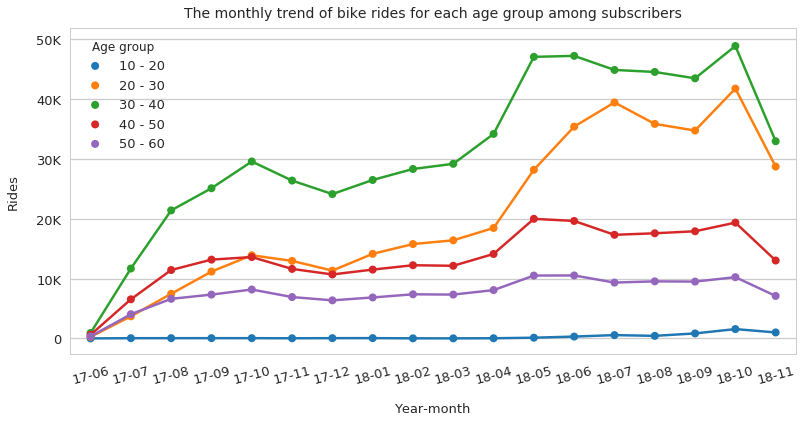

In [227]:
plt.figure(figsize=(13,6))
ax = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_age_df)
plt.title("The monthly trend of bike rides for each age group among subscribers", fontsize=14, y=1.015)
plt.xlabel('Year-month', labelpad=16, fontsize=13)
plt.xticks(rotation = 15)
plt.ylabel('Rides', labelpad=16, fontsize=13)
leg = ax.legend()
leg.set_title('Age group',prop={'size':12})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image12.png');

As expected 20 to 40 years old constitute for the majority of rides and growth rate.

#### End user behaviour for each user type (subscribers and customers) among 20 to 40 years old

In [228]:
subscriber_hour_df = sf_df[(sf_df['member_age']>=20) & (sf_df['member_age']<40) 
                              &(sf_df['start_time_hour']>5)&(sf_df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [229]:
subscriber_hour_df['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [230]:
subscriber_hour_df['count_perc'] = subscriber_hour_df['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [231]:
subscriber_hour_df['rank'] = subscriber_hour_df['count_perc'].rank(ascending=False).astype(int)

In [232]:
subscriber_hour_df_pivoted = subscriber_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [234]:
customer_hour_df = sf_df[(sf_df['member_age']>=20) & (sf_df['member_age']<40) 
                              &(sf_df['start_time_hour']>5)&(sf_df['user_type']=='Customer') 
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [235]:
customer_hour_df['start_time_weekday_abbr'] = pd.Categorical(customer_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [236]:
customer_hour_df['count_perc'] = customer_hour_df['count'].apply(lambda x: (x/customer_hour_df['count'].sum())*100) #male

In [237]:
customer_hour_df['rank'] = customer_hour_df['count_perc'].rank(ascending=False).astype(int)

In [238]:
customer_hour_df_pivoted = customer_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank').astype(int)

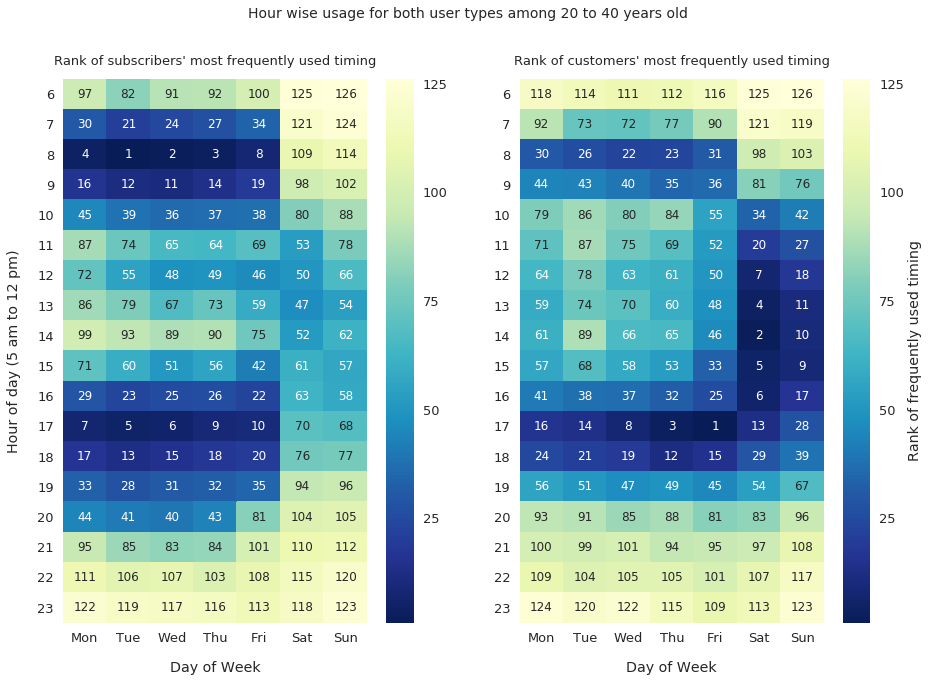

In [240]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.suptitle('Hour wise usage for both user types among 20 to 40 years old', fontsize=14)
sns.heatmap(subscriber_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12})
plt.title("Rank of subscribers' most frequently used timing", y=1.015, fontsize=13)
plt.xlabel('Day of Week', labelpad=16)
plt.ylabel('Hour of day (5 am to 12 pm)', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(122)
sns.heatmap(customer_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("Rank of customers' most frequently used timing", y=1.015, fontsize=13)
plt.xlabel('Day of Week', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('image13.png');

Therefore there is a clear difference between both groups in terms of end usage and timing of the usage of bikes. Subscribers use mostly during weekdays that too during peak hours whereas casual customers avail the service during weekends and evening hours of weekdays for may be leisure rides.

### Question 4. How are electric bikes doing and which age group favors e-Bikes more?

Ford GoBike annouced the launch of electric bikes as April 24th, 2018.
It can be implied that the new electric bikes were added in a week after April 24th.

#### Predict electric bike

In [241]:
non_electric_bike_id = sf_df[sf_df['start_time'] < pd.Timestamp(2018,4,24)]['bike_id'].unique()

In [243]:
electric_bike_id = []
for bike_id in sf_df[(sf_df['start_time'] > pd.Timestamp(2018, 4, 24)) & (sf_df['start_time'] < pd.Timestamp(2018, 5, 24))]['bike_id']: 
    if bike_id not in non_electric_bike_id and bike_id not in electric_bike_id:
        electric_bike_id.append(bike_id)

In [244]:
len(electric_bike_id)

313

In [245]:
sf_df['electric_bike_id'] = sf_df['bike_id'].isin(electric_bike_id)

#### Number of electric bike rides vs regular bike rides for the first month

In [247]:
(sf_df['electric_bike_id'].value_counts()/sf_df['electric_bike_id'].value_counts().sum())*100

False    91.896093
True      8.103907
Name: electric_bike_id, dtype: float64

91.9% of rides are non-electric bike rides. Electric bike rides account for just 8.1% of the total rides.

#### Verification of electric bikes with box plot for the first month

In [248]:
electric_bike_verification_df = sf_df[(sf_df['start_time']>pd.Timestamp(2018, 4, 24))&(sf_df['start_time']<pd.Timestamp(2018, 5, 24))].groupby(['start_time_date','bike_id']).size().reset_index()

In [249]:
electric_bike_verification_df = electric_bike_verification_df.rename(columns={0:'count'})

In [250]:
electric_bike_verification_df['bike_type']=electric_bike_verification_df['bike_id'].apply(lambda x: 'electric' if x in electric_bike_id else 'non-electric')

In [251]:
electric_bike_verification_df['start_time_date'] = electric_bike_verification_df['start_time_date'].map(lambda x: x.strftime('%m-%d'))

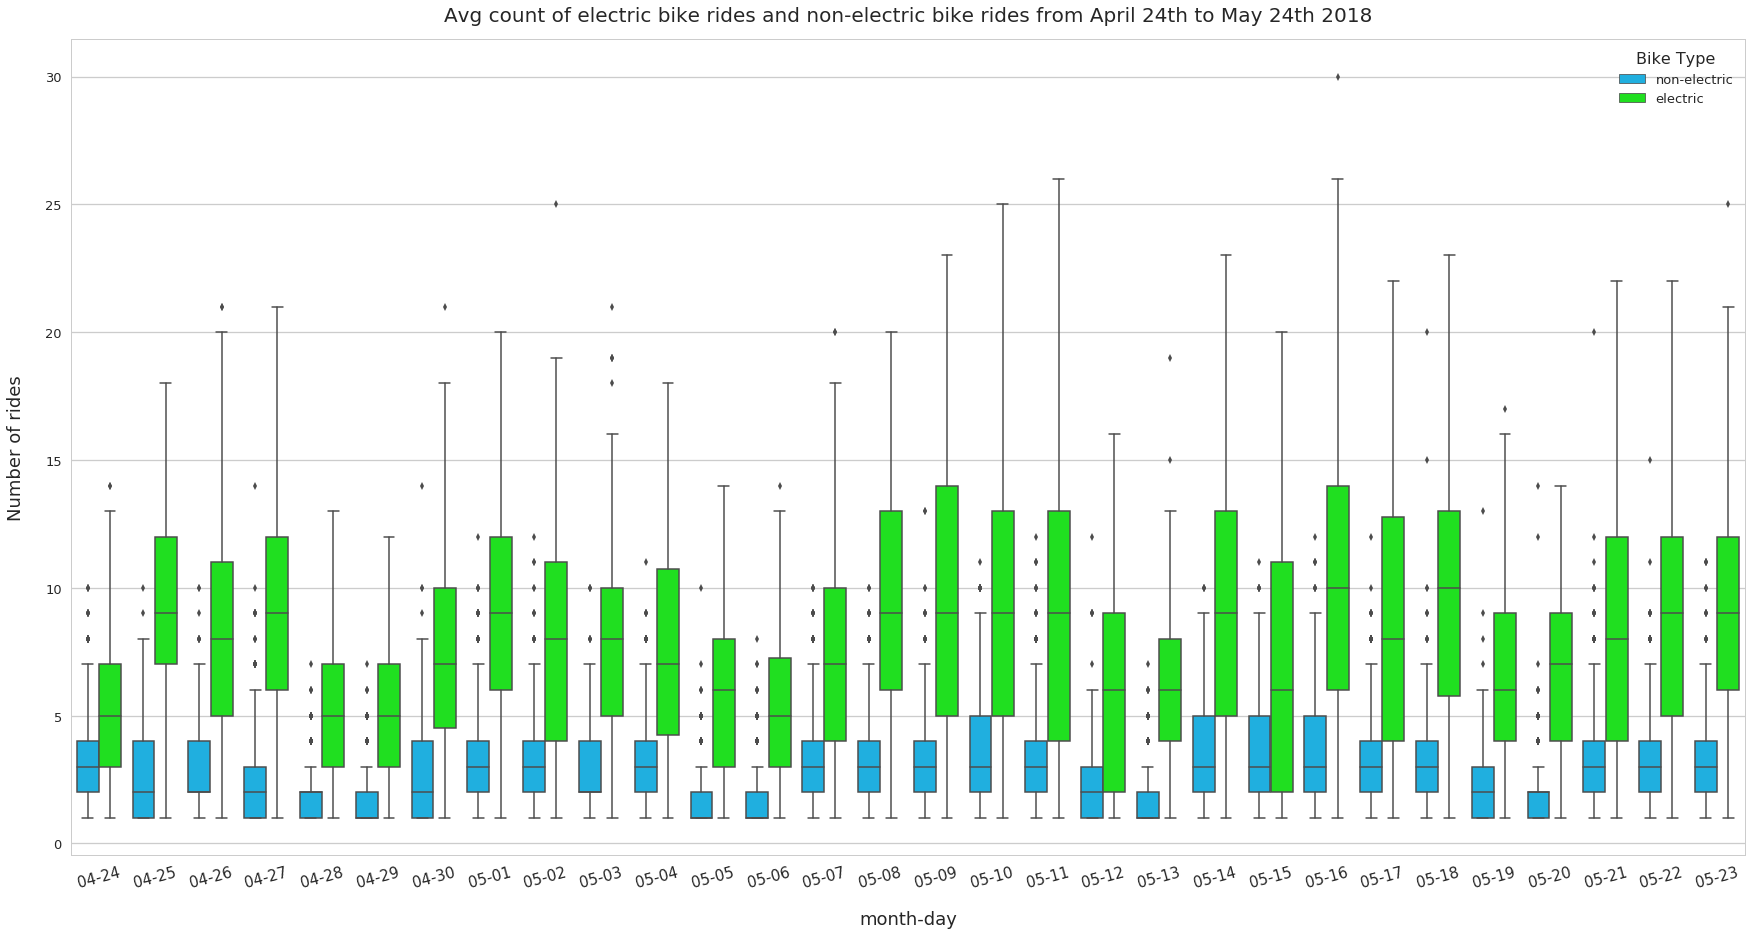

In [259]:
plt.figure(figsize=(30,15))
my_palette = {"electric":"lime", 'non-electric':'deepskyblue'}
ax = sns.boxplot(x='start_time_date', y='count', hue='bike_type', linewidth=1.5, palette=my_palette, data=electric_bike_verification_df)
plt.title('Avg count of electric bike rides and non-electric bike rides from April 24th to May 24th 2018', y=1.015, fontsize = 20)
plt.xlabel('month-day', labelpad=20, fontsize = 18)
plt.xticks(rotation = 15, fontsize = 15)
plt.ylabel('Number of rides', labelpad=20, fontsize = 18)
leg = ax.legend()
leg.set_title('Bike Type',prop={'size':16})
plt.savefig('image16.png');

Conventional bikes still dominate electric bikes, hopefully the trend reverses as usage of e-bikes picks up.

#### Count of daily electric bike rides from April 24th 2018 to November 30th 2018

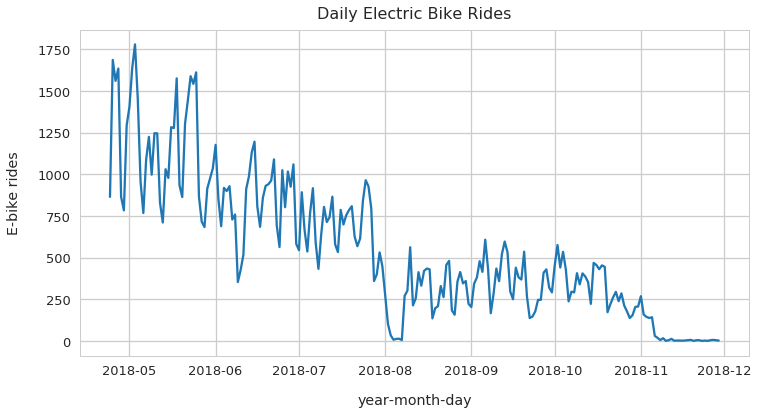

In [261]:
electric_df = sf_df[sf_df['electric_bike_id']==1].reset_index()
electric_df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(12,6))
plt.title('Daily Electric Bike Rides', fontsize=16, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('E-bike rides', labelpad=16)
plt.savefig('image16.png');

There was a huge spike at the end of April. After that, it seems the usage trend for electric bikes are decreasing rapidly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

    a. Subscribers had contributed around 88 percent of the rides where as casual customers had nearly 12 percent.

    b. Number of rides coming from subscribers had grown steadily since June 2017, leaving winter of 2018, where as for casual customers the growth had remained almost flat.

    c. Subscribers' average trip duration is around 11 minutes and customers' average trip duration is around 28 minutes.  

    d. Subscribers and customers trip distance were almost the same, which is around one mile. Therefore based on trip duration and average distance of each user type, we can say that though casual customers had made less number of rides than subscribers they are making longer rides. 

    e. As expected 20 to 40 years old constitute for the majority of rides and growth rate.

    f. Therefore there is a clear difference between both groups in terms of end usage and timing of the usage of bikes. Subscribers use mostly during weekdays that too during peak hours whereas casual customers avail the service during weekends and evening hours of weekdays for may be leisure rides.

    g. 91.9% of rides are non-electric bike rides. Electric bike rides account for just 8.1% of the total rides. Conventional bikes still dominate electric bikes, hopefully the trend reverses as usage of e-bikes picks up.

    h. There was a huge spike at the end of April. After that, it seems the usage trend for electric bikes are decreasing rapidly.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was observed that at the beginning when electrical bikes were launched there was a high demand for these bikes. But after a while, it was decreased suddenly. May be users are not finding e-bikes as convenient and powerful as conventional ones.

## Multivariate Exploration


Relationship of three variables (Age group, weekdays, timeframe of subscribers) with hiring will be analysed.

In [278]:
subscriber_hour_df2 = sf_df[(sf_df['member_age']>=20) & (sf_df['member_age']<30) 
                              &(sf_df['start_time_hour']>5)&(sf_df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [279]:
subscriber_hour_df3 = sf_df[(sf_df['member_age']>=30) & (sf_df['member_age']<40) 
                              &(sf_df['start_time_hour']>5)&(sf_df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [280]:
subscriber_hour_df4 = sf_df[(sf_df['member_age']>=40) & (sf_df['member_age']<50) 
                              &(sf_df['start_time_hour']>5)&(sf_df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [281]:
subscriber_hour_df2['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df2['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
subscriber_hour_df3['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df3['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
subscriber_hour_df4['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df4['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
subscriber_hour_df2['count_perc'] = subscriber_hour_df2['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)
subscriber_hour_df3['count_perc'] = subscriber_hour_df3['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)
subscriber_hour_df4['count_perc'] = subscriber_hour_df4['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)
subscriber_hour_df2['rank'] = subscriber_hour_df2['count_perc'].rank(ascending=False).astype(int)
subscriber_hour_df3['rank'] = subscriber_hour_df3['count_perc'].rank(ascending=False).astype(int)
subscriber_hour_df4['rank'] = subscriber_hour_df4['count_perc'].rank(ascending=False).astype(int)

In [282]:
subscriber_hour_df_pivoted2 = subscriber_hour_df2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_hour_df_pivoted3 = subscriber_hour_df3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_hour_df_pivoted4 = subscriber_hour_df4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

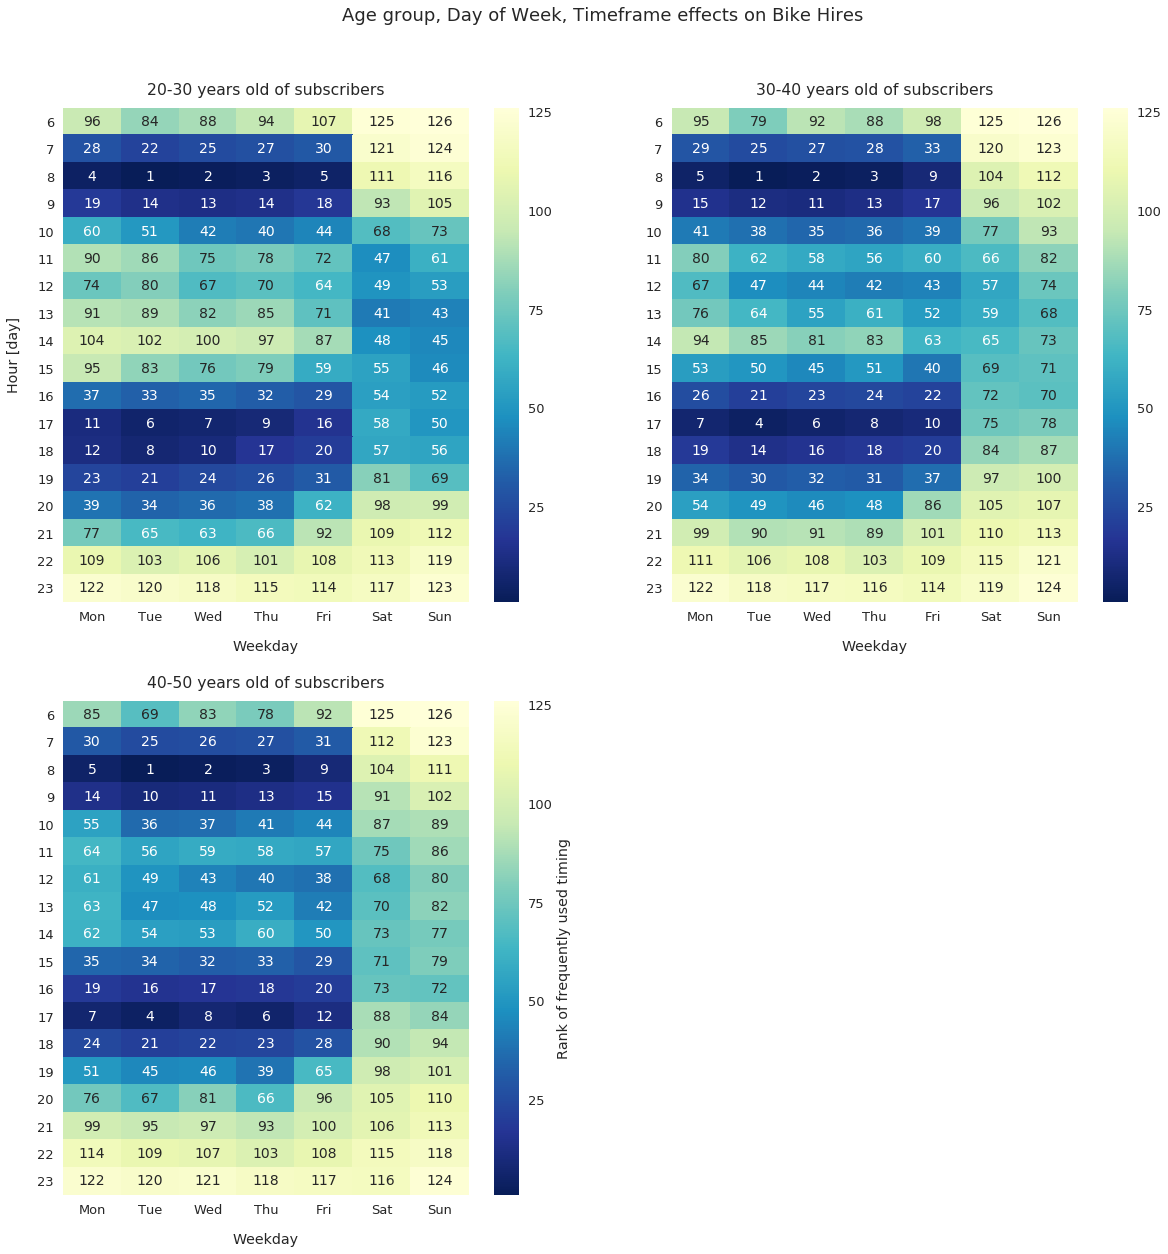

In [284]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Age group, Day of Week, Timeframe effects on Bike Hires', fontsize=18, y=0.95)
sns.heatmap(subscriber_hour_df_pivoted2, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subscriber_hour_df_pivoted3, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subscriber_hour_df_pivoted4, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('image18.png');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For subscribers, bike rides were analysed along three dimensions age group, time of day and day of week.

Observations:

    a. The general trend that subscribers avail the service mostly during peak hours on week days remains same among all three age groups (20 to 30, 30 to 40 and 40 to 50).
    b. Older users (40 to 50) tend to ride bikes even during afternoon more often than the younger age groups (20 to 30 and 30 to 40). This may be due to their nature of work (part time or regular).

### Were there any interesting or surprising interactions between features?

Apart from the above stated observations there weren't any other particularly interesting interaction between the features analysed.

## Conclusions

#### Univariate Exploration:

    a. 20 to 40 years old people took the more than 70 percent of bike rides. Among all, 30 to 40 years old account for more than 40 percent of all bike rides.
    
    b. Males took around more than 75 percent of all bike rides, and female took around more than 20 percent.
    
    c. Users use this service more on weekdays than weekends. May be they prefer to commute to work by bikes.
    
    d. The peak usage occurs during peak hours (8 to 9 am and 5 to 6 pm). This shows users are commuting to and from office using this service.

#### Bivariate Exploration:

    a. Subscribers had contributed around 88 percent of the rides where as casual customers had nearly 12 percent.

    b. Number of rides coming from subscribers had grown steadily since June 2017, leaving winter of 2018, where as for casual customers the growth had remained almost flat.

    c. Subscribers' average trip duration is around 11 minutes and customers' average trip duration is around 28 minutes.  

    d. Subscribers and customers trip distance were almost the same, which is around one mile. Therefore based on trip duration and average distance of each user type, we can say that though casual customers had made less number of rides than subscribers they are making longer rides. 

    e. As expected 20 to 40 years old constitute for the majority of rides and growth rate.

    f. Therefore there is a clear difference between both groups in terms of end usage and timing of the usage of bikes. Subscribers use mostly during weekdays that too during peak hours whereas casual customers avail the service during weekends and evening hours of weekdays for may be leisure rides.

    g. 91.9% of rides are non-electric bike rides. Electric bike rides account for just 8.1% of the total rides. Conventional bikes still dominate electric bikes, hopefully the trend reverses as usage of e-bikes picks up.

    h. There was a huge spike at the end of April. After that, it seems the usage trend for electric bikes are decreasing rapidly.

#### Multivariate Exploration:
    
    a. The general trend that subscribers avail the service mostly during peak hours on week days remains same among all three age groups (20 to 30, 30 to 40 and 40 to 50).
    
    b. Older users (40 to 50) tend to ride bikes even during afternoon more often than the younger age groups (20 to 30 and 30 to 40). This may be due to their nature of work (part time or regular).